In [19]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.formula.api import ols

url_path = "https://cdn.jsdelivr.net/gh/LarsHenrikNelson/PatchClampHandbook/data/"

# Linear regression
Linear regression is one of the most used ways to model data. Linear regression has an equation form of: $$y=X\beta+\epsilon$$ where is y is a vector of dependent variable (can also be a maxtrix Y if it is multivariate regression), X is a matrix of independent variables with each column being a feature and each row being a subject, $\beta$ is a vector coefficients, and $\epsilon$ is the vector of errors. $\epsilon$ is add to the equation because we can never fully model the relationship between y and X. Linear regression makes several assumptions about $\epsilon$. If you look at the equation through the lens of linear algebra $X\beta$ is actually the inner dot product between the matrix $X$ and vector $\beta$. $y=mx+b$ is a specific form of the linear equation where there are just two coefficients m and b. Linear regresssion that has more than just one coefficient like $y=mx+b$ is called multiple linear regression. Linear regression can model non-linear and categorical features. Linear regression using least squares which is a minimization method where the $\epsilon$ is minimized. By minimizing distance between the predicted values and the given values. Minimization uses calculus. In some cases there is a solvable equation and in other cases we just approximate solution.

## Ordinary least squares
Ordinary least squares (OLS) is probably what you are using when you run linear regression and ANOVA. OLS has the same equation as $y=X\beta$ but has what is called a closed form solution; the solution is solvable with linear algebra with the equation $\beta=(X^TX)^{-1}X^Ty$. OLS assumes that a constant change in the predictor leads to a constant change in the dependent variable.

## Slopes
Slopes are just the regression coefficients without the intercept coefficient. $\beta$ will be a vector of coefficients that is the number of your independent variables + one. The extra coefficient is the intercept. You can actually measure the mean of you data if your independent variables are all 1 so you slope will be 0 and the intercept will be the mean. Not computationally efficient but possible.

## Intercept
The intercept is the extra coefficient that can be added to the regression equation. You do not need a intercept to fit a linear regression. The intercept is similar to the y-offset that we saw in the curves chapter.

## Building a regression model
We will go over how to build a regression. We will start with a simple linear regression, cover multiple linear regression, regression with categorical independent variables, polynomial regression and interactions between variables. You can think of categorical and polynomial variables as a type of multiple linear regression.

## Simple linear regression
Simple linear regression has the equation $y=mx+b$. $m$ and $b$ are coefficients which make up the $\beta$ vector of coefficients in the general linear regression equation $y=X\beta$. You can run simple linear regression three ways in Python; manually or using Scipy and StatModels. We will use Scipy first. After that we will use StatsModels since that will be used for more advanced regression.

### Scipy
Scipy has a simple interface. I recommend it for any simple linear regression task. However, it does not allow for residual analyis. If you need to 100% ensure your model fits well you should use Statsmodels. You can manually create the residuals but Statsmodels has several helper functions that make it easier. To get the residuals we can just find the predicted point for each x and subtract that from each y. For a simple residual analysis you see the residuals randomly distibutes across 0 when plotted against the independent variable. For simple regression this works but, for multiple regression this will not work because you have many x variables.

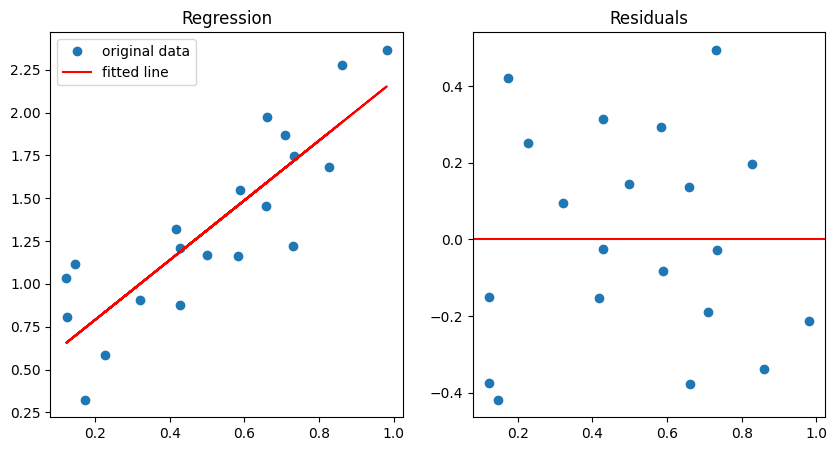

In [2]:
rng = np.random.default_rng()
n = 20
x = rng.random(20)
y = 1.6 * x + rng.random(20)
res = stats.linregress(x, y)
y_fit = res.intercept + res.slope * x
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(x, y, "o", label="original data")
ax[0].plot(x, y_fit, "r", label="fitted line")
ax[0].set_title("Regression")
ax[0].legend()
ax[1].set_title("Residuals")
ax[1].axhline(0, color="red")
_ = ax[1].plot(x, y_fit-y, "o")

### Statsmodels
For statsmodels we will fit the regression two different ways; using the formula method and the by hand method. The formula method is easier to use to but can hide some preprocessing.

#### By hand method
By hand is really not by hand but we do have to do some prepocessing. If you want to fit and intercept for your model you need to add a column of 1s to the matrix X so that you matrix X will have a column of 1s and a column for independent variable. Notice how we have to pass our fitted model back to the original OLS model to get the predicted values. We an just grab the residuals from the fitted model rather than computing them manually.

[0.44118166 1.74451803]


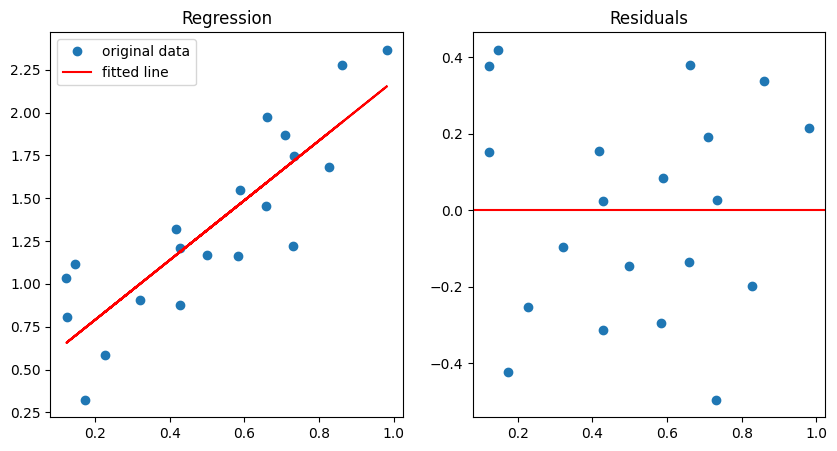

In [30]:
x_const = add_constant(x)
ols_model = OLS(y, x_const)
ols_fit = ols_model.fit()
y_fit = ols_model.predict(ols_fit.params, x_const)
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(x, y, "o", label="original data")
ax[0].plot(x, y_fit, "r", label="fitted line")
ax[0].set_title("Regression")
ax[0].legend()
ax[1].set_title("Residuals")
ax[1].axhline(0, color="red")
_ = ax[1].plot(x, ols_fit.resid, "o")
print(ols_fit.params)

#### The formula method
The formula method is probably the best way to fit models. Python does not natively support formulas like R does so Statsmodels has a package called [Patsy](https://patsy.readthedocs.io/en/latest/) that they use to create a formula string which is then processed to create the design matrix which is just a processed version of your depedent variables. Formulas contain the independent variable on the right side and the dependent variable on the left side separated by a `~`: `"dependent ~ independent"`. This formula automatically include the intercept implicity like this `"dependent ~ 1 + independent"`.

Intercept    0.441182
x            1.744518
dtype: float64


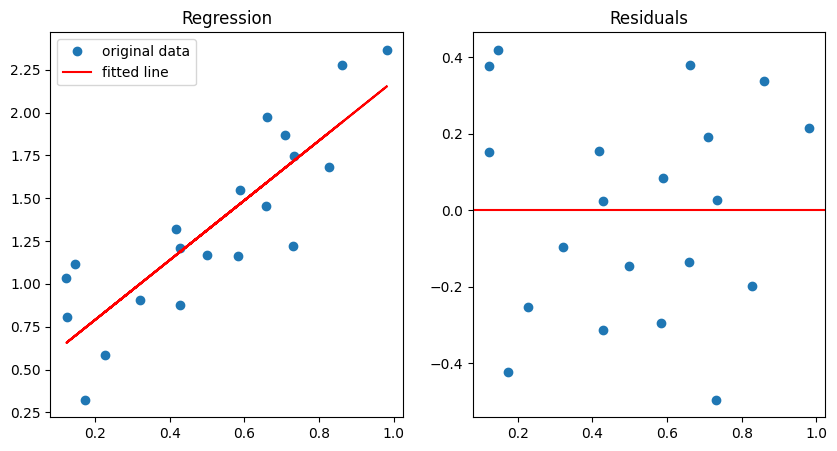

In [29]:
ols_formula_model = ols("y~x", data={"y":y, "x":x})
formula_fit = ols_formula_model.fit()
y_fit = formula_fit.predict(exog=dict(x=x))
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].plot(x, y, "o", label="original data")
ax[0].plot(x, y_fit, "r", label="fitted line")
ax[0].set_title("Regression")
ax[0].legend()
ax[1].set_title("Residuals")
ax[1].axhline(0, color="red")
_ = ax[1].plot(x, formula_fit.resid, "o")
print(formula_fit.params)

#### Summary output
You may have noticed that the params of the Statsmodels models only show the coefficients. To get the full fit output we call the summary method. This is very similar to R. You will notice there are a lot of different variables in the formula table that Scipy does not provide. We will go over some of the output. Below is the output.


In [31]:
formula_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     49.13
Date:                Mon, 29 Dec 2025   Prob (F-statistic):           1.53e-06
Time:                        15:53:58   Log-Likelihood:                -2.2850
No. Observations:                  20   AIC:                             8.570
Df Residuals:                      18   BIC:                             10.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4412      0.142      3.099      0.006       0.142       0.740
x              1.7445      0.249      7.009      0.000       1.222       2.267
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.210
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                1.061
Skew:                          -0.101   Prob(JB):                        0.588
Kurtosis:                       1.890   Cond. No.                         4.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-squared**: $1-\frac{\sum_{i=1}^{n}y_i-\hat{y}_i}{\sum_{i=1}^{n}y_i-\bar{y}}$ where $\hat{y}_i$ are the predicted values and \bar{y} is the mean of the dependent variable (y). R-squared is tells you how good the model fits where 0 is does not fit at all and 1 is a perfect fit.<br>
**Adj. R-squared**: $1-\frac{(1-R^2)(n-1)}{n-k-1}$ where n is the number of dependent variables and k is the number of features (columns of x + 1 unless you already included the constant). This R-square penalizes high

### ANOVA
ANOVA just pools the effects of of multiple coefficients in the linear regression model when you have categorical variables. For example, if you have a categorical variable treatment with three groups you end up two regression coefficients, each with their own p value. However, we generally want a single p value for our categorical variable so ANOVA pools the variance estimates and derives a F value with degrees of freedom to derive a p value.